## Red wine quality

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays,industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive.

Aim of the red wine quality dataset is to predict which of the physiochemical features make good wine. With 11 variables and 1 output variable (quality) given:
Fixed Acidity: are non-volatile acids that do not evaporate readily
Volatile Acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
Citric Acid: acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines
Residual Sugar: is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet
Chlorides: the amount of salt in the wine
Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
Total Sulfur Dioxide: is the amount of free + bound forms of SO2
Density: sweeter wines have a higher density
pH: describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
Alcohol: available in small quantities in wines makes the drinkers sociable
Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
Quality: which is the output variable/predictor

Content

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)



1 - File Reader (for csv) to linear correlation node and to interactive histogram for basic EDA.
2- File Reader to 'Rule Engine Node' to turn the 10 point scale to dichtome variable (good wine and rest), the code to put in the rule engine is something like this:

$quality$ > 6.5 => "good"
TRUE => "bad"
3- Rule Engine Node output to input of Column Filter node to filter out your original 10point feature (this prevent leaking)
4- Column Filter Node output to input of Partitioning Node (your standard train/tes split, e.g. 60%/40%, choose 'random' or 'stratified')
5- Partitioning Node train data split output to input of Train data split to input Decision Tree Learner node and
6- Partitioning Node test data split output to input Decision Tree predictor Node
7- Decision Tree learner Node output to input Decision Tree Node input
8- Decision Tree output to input ROC Node.. (here you can evaluate your model base on AUC value)
Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!


In [1]:
#importing all the required librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv(r"E:\datatrained\redwinequality.csv") 

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

## EDA

In [10]:
data1 = data.groupby("quality").mean()

In [11]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

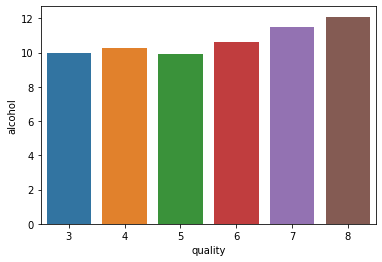

In [12]:
sns.barplot(x= data1.index,y = "alcohol", data = data1)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

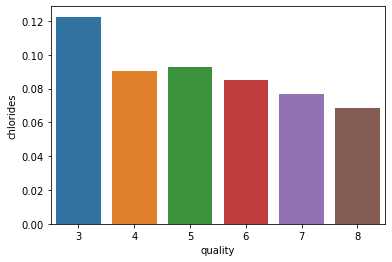

In [13]:
sns.barplot(x= data1.index,y = "chlorides", data = data1)

In [14]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

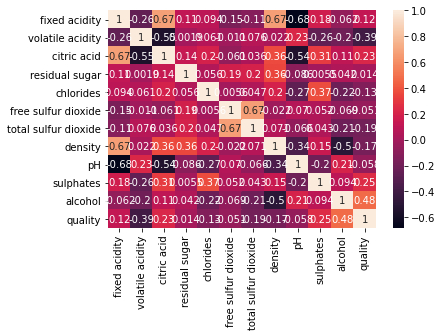

In [15]:
sns.heatmap(data.corr(),annot=True)

## Outliers

In [16]:
df = data.copy()

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [19]:
df = df.drop([f"fixed acidity","free sulfur dioxide","volatile acidity","citric acid"],axis = 1)

<AxesSubplot:>

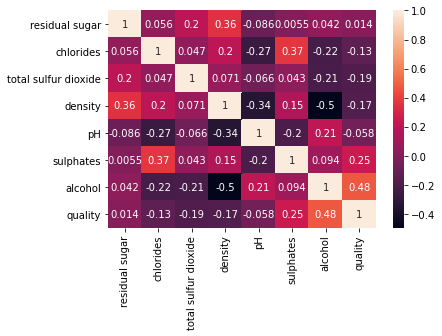

In [20]:
sns.heatmap(df.corr(),annot=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   residual sugar        1599 non-null   float64
 1   chlorides             1599 non-null   float64
 2   total sulfur dioxide  1599 non-null   float64
 3   density               1599 non-null   float64
 4   pH                    1599 non-null   float64
 5   sulphates             1599 non-null   float64
 6   alcohol               1599 non-null   float64
 7   quality               1599 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 100.1 KB


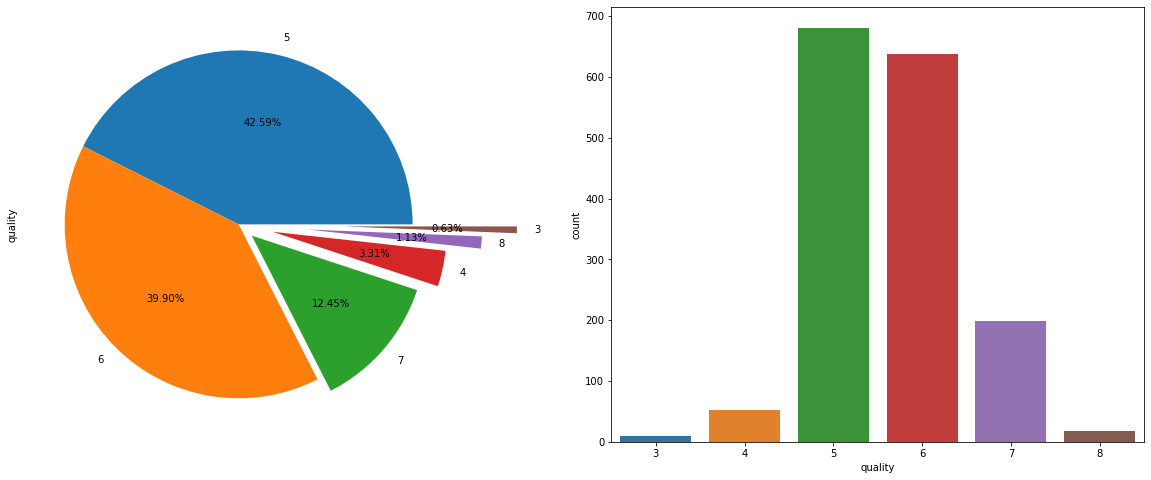

In [23]:
plt.figure(figsize = (21,8))
plt.subplot(1,2,1)
data['quality'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0, 0, 0.1,0.2,0.4,0.6))
plt.subplot(1,2,2)
sns.countplot(x = 'quality', data = data)
plt.show()

## Train-Test Split

In [24]:
 y = df.quality

In [25]:
df = df.drop("quality", axis = 1 )

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=41)

In [27]:
X_train.shape

(1279, 7)

In [28]:
X_test.shape

(320, 7)

## slicing

In [29]:
cols = df.columns

In [30]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test) 


In [31]:
X_train = pd.DataFrame(data = X_train, columns=cols)
X_test = pd.DataFrame(data = X_test, columns=cols)

In [32]:
X_train

,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.095115,-0.051327,-0.202182,0.031107,0.768745,-0.149684,-0.663977
1,-0.528681,-0.434354,-1.090705,0.136486,0.961648,0.143137,-0.851500
2,-0.600942,0.140187,-0.048988,-0.516863,-0.452972,-0.911019,-0.570216
3,-0.384159,0.352980,1.299116,-0.232340,-1.738989,1.431549,-0.288932
4,-0.528681,-0.796102,1.299116,-2.308303,-0.067167,-0.911019,0.132993
...,...,...,...,...,...,...,...
1274,0.338452,0.118908,-0.508569,1.506410,-0.838777,-0.149684,0.367396
1275,-0.239637,-0.264119,-0.692402,1.743513,-1.546087,1.080164,-1.132783
1276,0.627496,0.055070,1.237838,1.585444,-0.452972,-0.208249,-0.663977
1277,-0.239637,-0.306678,-0.661763,-1.654954,-0.195768,0.026008,1.867576


## Modeling

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV


In [34]:
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}


In [35]:
logmodel = LogisticRegression(max_iter = 1000)


In [36]:
rsc = RandomizedSearchCV(estimator=logmodel,param_distributions= parameters ,cv=5) 
rsc.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",rsc.best_params_)
print("Accuracy :", rsc.best_score_ )


tuned hpyerparameters :(best parameters)  {'penalty': 'l2', 'C': 1000.0}
Accuracy : 0.5825275735294118


In [37]:
logmodel = LogisticRegression(max_iter = 1000)


In [38]:
from sklearn.model_selection import RandomizedSearchCV


In [39]:
rsc.fit(X_train,y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2']})

In [40]:
rsc.best_params_
rsc.best_score_

0.5825275735294118

In [41]:
X_train.columns


Index(['residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [42]:
#spliting training and testing data
from sklearn.model_selection import train_test_split

X = data.drop(['quality'], axis = 1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [43]:
#slicing using MinMax scaler

from sklearn.preprocessing import MinMaxScaler

cols = list(X_train.columns)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,0.326927,0.336476,0.269035,0.112558,0.126932,0.210695,0.144010,0.491217,0.449846,0.199082,0.305580
std,0.156079,0.146721,0.194518,0.099929,0.082269,0.146017,0.118742,0.137097,0.122295,0.105444,0.159878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.223140,0.090000,0.068493,0.096828,0.098592,0.056537,0.408223,0.370079,0.131737,0.169231
50%,0.292035,0.330579,0.250000,0.089041,0.111853,0.183099,0.109541,0.494126,0.448819,0.173653,0.261538
75%,0.407080,0.425620,0.420000,0.116438,0.130217,0.281690,0.201413,0.568282,0.519685,0.239521,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## MODEL : Logstic Regression


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Logistic regression is used to predict the class (or category) of individuals based on one or multiple predictor variables (x). It is used to model a binary outcome, that is a variable, which can have only two possible values: 0 or 1, yes or no.

In [54]:
logreg=LogisticRegression(C=1000)
logreg.fit(X_train,y_train)

LogisticRegression(C=1000)

In [55]:
print(f'Training set score: {round(logreg.score(X_train, y_train) * 100, 2)}%')


Training set score: 59.61%


In [56]:
print(f'Test set score: {round(logreg.score(X_test, y_test) * 100, 2)}%')


Test set score: 59.58%


In [57]:
logreg = LogisticRegression(solver = 'liblinear', random_state = 0)

logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)

#print accuracy score
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')


Model accuracy score: 58.54%


## MODEL : RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [59]:
model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [60]:
print((model.score(X_train, y_train))*100)
print((model.score(X_test, y_test))*100)


100.0
68.75


## Accuracy 

In [61]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import f1_score,accuracy_score,classification_report

print('Accuracy Score : ', accuracy_score(y_test,y_pred))
print('F1 Score : ',f1_score(y_test,y_pred, average='weighted'))
print('\n\n\n')
print('Classification Report : \n\n',classification_report(y_test,y_pred))

Accuracy Score :  0.5854166666666667
F1 Score :  0.5357082398235566




Classification Report : 

               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         7
           5       0.64      0.84      0.73       197
           6       0.53      0.56      0.55       202
           7       0.25      0.03      0.06        63
           8       0.00      0.00      0.00         7

    accuracy                           0.59       480
   macro avg       0.24      0.24      0.22       480
weighted avg       0.52      0.59      0.54       480

